## Importing all the necessary library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

## Basic Exploration

In [2]:
# reading csv file
df = pd.read_csv("water_potability.csv")

In [3]:
#Extracting column names from the DataFrame "df" and coverting it to a python list
columns_list = df.columns.tolist()
print("Column Names: ")
print(columns_list)

Column Names: 
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [4]:
#Loading the first five rows of the dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Understanding the data
* Potability = 0, Unsafe Drinking Water
* Potability = 1, Safe Drinking Water

In [5]:
#df.shape determine the dimensions of a DataFrame.
print("Shape of the DataFrame:",df.shape)

Shape of the DataFrame: (3276, 10)


In [6]:
print("There are", df.shape[0], "rows and", df.shape[1], "columns in the given data frame.")

There are 3276 rows and 10 columns in the given data frame.


In [7]:
#Statistical measure of the dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate rows: ")
print(duplicate_rows)

Duplicate rows: 
Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []


## Detecting Missing Values

In [9]:
# understanding the data and its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#### Based on the information presented in the above table, it is apparent that there exist some null or missing values. The following command can be used to determine the count of missing values within each respective column. 

In [10]:
 df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
# Calculating the percentage of missing values in each column
percentage_missing = df.isna().sum() / len(df) * 100
print("Percentage of Missing Data: ")
print(percentage_missing)

Percentage of Missing Data: 
ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


<Axes: >

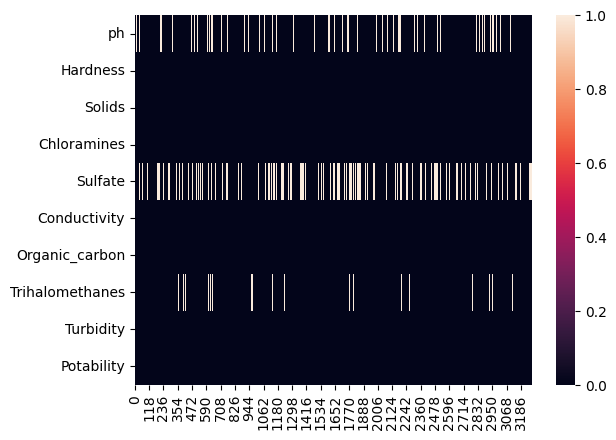

In [12]:
#Creating a heatmap to visualize the distribution of missing values across columns in the transposed df
sns.heatmap(df.isna().transpose())

## Handling Missing Values

#### On observing the heatmap presented earlier reveals that three columns conatin misssing values i.e., ph, Sulfate, Trihalomethanes. Detecting missing values in certain columns iniiates an examination for outliers. Let's check for outliers in these columns as outliers can significantly impact data analysis.

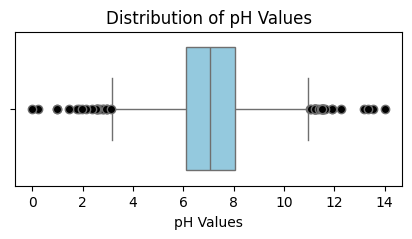

In [13]:
#Checking for outliers in ph column
plt.figure(figsize=(5,2))
sns.boxplot(x = "ph", data = df, color = "skyblue", flierprops = dict(markersize = 6, markerfacecolor = "black"))
plt.xlabel("pH Values")
plt.title("Distribution of pH Values")
plt.show()

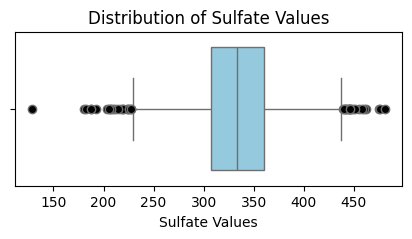

In [14]:
#Checking for outliers in sulfate column
plt.figure(figsize=(5,2))
sns.boxplot(x = "Sulfate", data = df, color = "skyblue", flierprops = dict(markersize = 6, markerfacecolor = "black"))
plt.xlabel("Sulfate Values")
plt.title("Distribution of Sulfate Values")
plt.show()

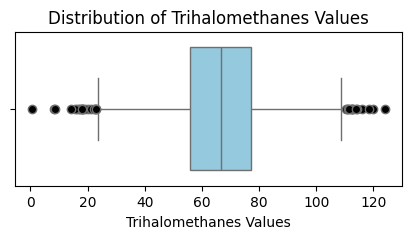

In [15]:
#Checking for outliers in Trihalomethanes column
plt.figure(figsize=(5,2))
sns.boxplot(x = "Trihalomethanes", data = df, color = "skyblue", flierprops = dict(markersize = 6, markerfacecolor = "black"))
plt.xlabel("Trihalomethanes Values")
plt.title("Distribution of Trihalomethanes Values")
plt.show()

#### Understanding the skewness value
* 0 indicates a perfecly symmetrical distribution.
* Greater than 0 (positive skew) indicates a right-skewed distribution (tail on the right).
* Less than 0 (negative skew) indicates a left-skewed distribution (tail on the left).

In [16]:
#Calculating the skewness for each column in the df
skew_values = df.skew()
print("Skewness of each column:")
print(skew_values)

Skewness of each column:
ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
Potability         0.450784
dtype: float64


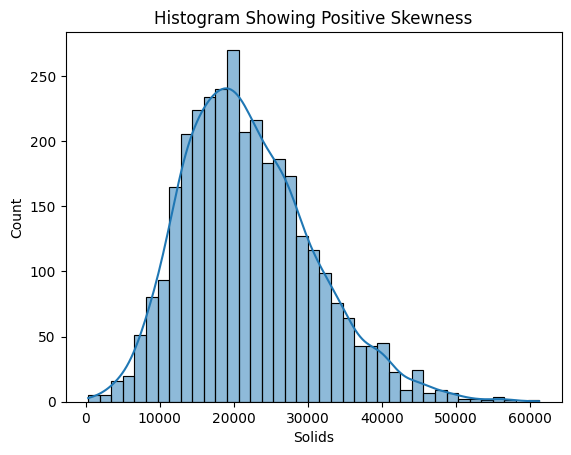

In [17]:
sns.histplot(x = "Solids", data = df, kde = True)
plt.xlabel("Solids")
plt.ylabel("Count")
plt.title("Histogram Showing Positive Skewness")
plt.show()

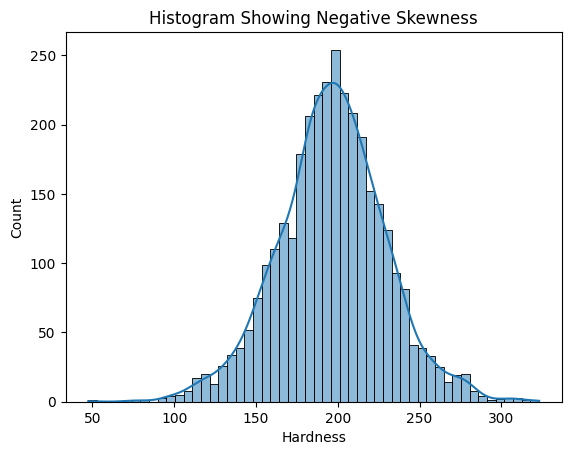

In [18]:
sns.histplot(x = "Hardness", data = df, kde = True)
plt.xlabel("Hardness")
plt.ylabel("Count")
plt.title("Histogram Showing Negative Skewness")
plt.show()

#### As these three columns — ph, Sulfate, Trihalomethanes — contain numerical data, we will address the missing values using an imputation method.

In [19]:
# Calculating median values for "ph", "Sulfate" and "Trihalomethanes"
median_value1 = df["ph"].median()
median_value2 = df["Sulfate"].median()
median_value3 = df["Trihalomethanes"].median()

In [20]:
# Filling missing values in "ph", "Sulfate" and "Trihalomethanes" columns with their respective medians
df["ph"].fillna(median_value1, inplace = True)
df["Sulfate"].fillna(median_value2, inplace = True)
df["Trihalomethanes"].fillna(median_value3, inplace = True)

In [21]:
# Checing the mising values again
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Target Variable

In [22]:
# Identifying the potential target variable
potential_target = [col for col in columns_list if col not in ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
target_variable = potential_target[0]  

print("Identified Target Variable:", target_variable)

Identified Target Variable: Potability


In [23]:
#Checking the distrubution of target variable
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

#### Within the dataset comprising 3276 entries, 1998 entries indicate unsafe water potability, while 1278 entries denote safe water potability.
* 0 = Not Potable
* 1 = Potable

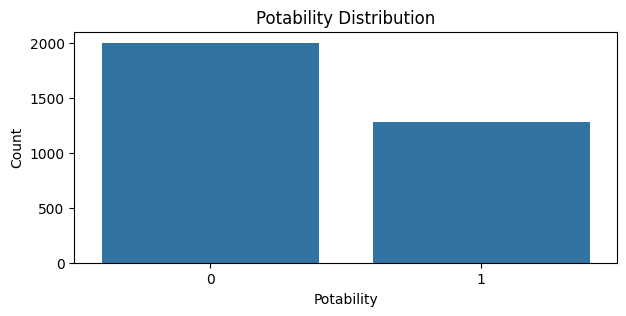

In [24]:
# Creatng count plot to visualize the distribution of "Potability" in the df
plt.figure(figsize = (7,3))
sns.countplot(x = "Potability", data = df)
plt.xlabel("Potability")
plt.ylabel("Count")
plt.title("Potability Distribution")
plt.show()

In [25]:
# Grouping the dataset by "Potability" to calculate the mean values of other columns for each class
df.groupby("Potability").mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.077736,196.733292,21777.490788,7.092175,334.200184,426.730454,14.364335,66.320635,3.965800
1,7.068655,195.800744,22383.991018,7.169338,332.683125,425.383800,14.160893,66.543247,3.968328


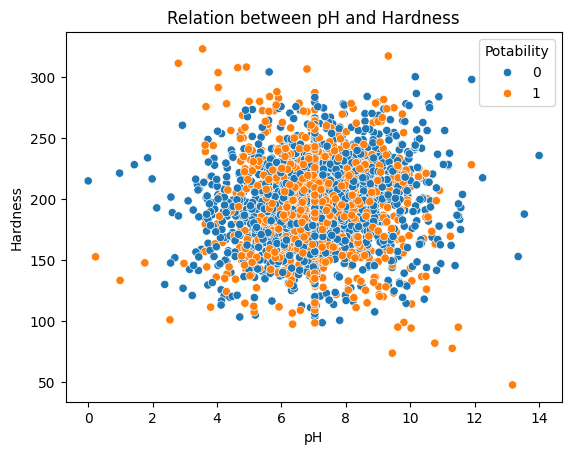

In [26]:
# Creating a scatter plot to explore the relationship between "ph" and "Hardness"
sns.scatterplot(x = "ph", y = "Hardness", data = df,hue="Potability")
plt.xlabel("pH")
plt.ylabel("Hardness")
plt.title("Relation between pH and Hardness")
plt.show()

## Correlation
Understanding the correlation coefficient: df.corr() function is a powerful tool to quickly assess the relationships between variables and determine which pairs of columns have stronger and weaker connections in terms of linear association.
* The correlation coefficient ranges between -1 to 1, where, 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation and 0 indicates no linear reationship.
* It returns a table showing the correlation values between all pairs of numerical columns in the df. The diagonal (top left to bottom right) contains self-correlation, which is always 1. This means a column is perfectly corelated with itself.
* Positive correlations imply that as one variable increases, the other tends to increase. Negative correlations indicate that as one variable increases, the other tends to decrease. 

In [27]:
# Calculating the pairwise correlation coefficients between numerical columns in the df
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075760,-0.082004,-0.031741,0.014178,0.017466,0.040240,0.003145,-0.036107,-0.003014
Hardness,0.075760,1.000000,-0.046899,-0.030054,-0.092833,-0.023915,0.003610,-0.012707,-0.014449,-0.013837
Solids,-0.082004,-0.046899,1.000000,-0.070148,-0.149747,0.013831,0.010242,-0.008799,0.019546,0.033743
Chloramines,-0.031741,-0.030054,-0.070148,1.000000,0.023762,-0.020486,-0.012653,0.016614,0.002363,0.023779
Sulfate,0.014178,-0.092833,-0.149747,0.023762,1.000000,-0.014182,0.027102,-0.025657,-0.009767,-0.020476
Conductivity,0.017466,-0.023915,0.013831,-0.020486,-0.014182,1.000000,0.020966,0.001184,0.005798,-0.008128
Organic_carbon,0.040240,0.003610,0.010242,-0.012653,0.027102,0.020966,1.000000,-0.012958,-0.027308,-0.030001
Trihalomethanes,0.003145,-0.012707,-0.008799,0.016614,-0.025657,0.001184,-0.012958,1.000000,-0.021487,0.006887
Turbidity,-0.036107,-0.014449,0.019546,0.002363,-0.009767,0.005798,-0.027308,-0.021487,1.000000,0.001581
Potability,-0.003014,-0.013837,0.033743,0.023779,-0.020476,-0.008128,-0.030001,0.006887,0.001581,1.000000


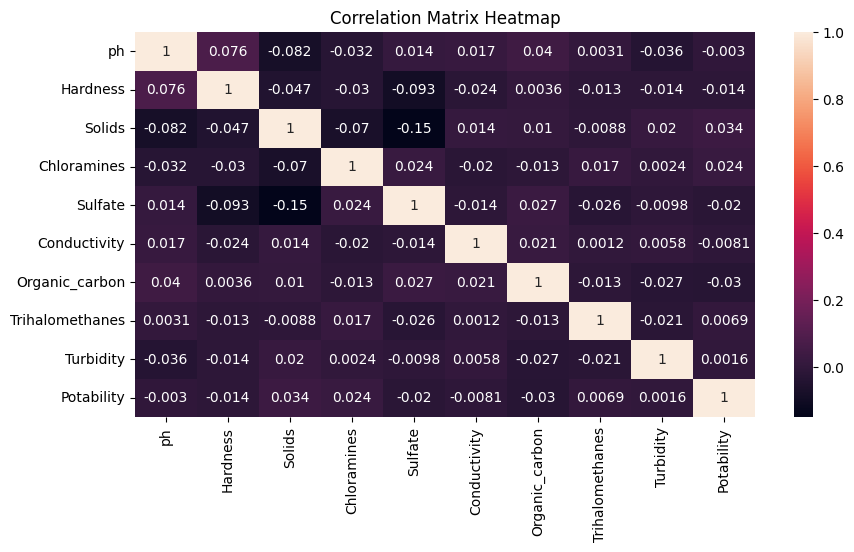

In [28]:
# Creating a heatmap to visualize the correlation matrix with annotations
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix Heatmap")
plt.show()

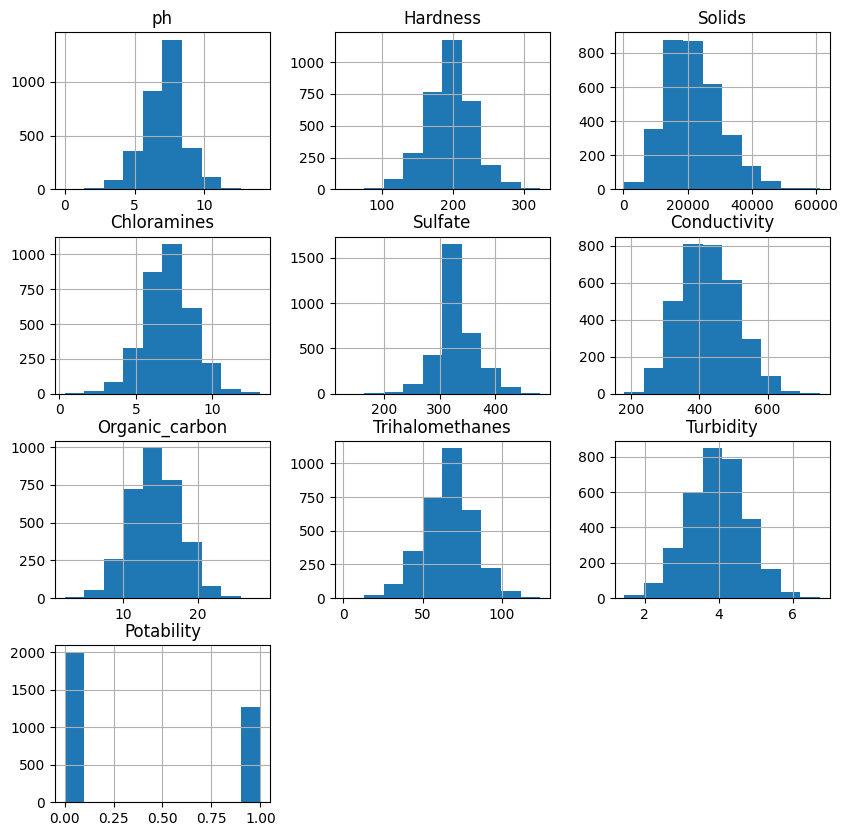

In [29]:
#Creating Histogram of each and every column
df.hist(figsize=(10,10))
plt.show()

## Splitting the Feature and Target Variable
* Target Variable (Dependent Variable): The target variable is the variable that a model is intended to predict or estimate based on the information provided by the feature variables. In regression, it's the variable to be predicted.
* Feature Variable (Independent Variable): Feature variables, also known as independent variables or predictors, are the set of variables used to predict or explain the variation in the target variable. These variables provide the information or characteristics that the model uses to make predictions.

In [30]:
X = df.iloc[:, :9] #independent variable
y = df.Potability #dependent variable

In [31]:
print("Dependent / Target Variables: ")
print(y)

Dependent / Target Variables: 
0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64


In [32]:
print("Independent Variables: ")
print(X)

Independent Variables: 
            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.036752  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.073546   
2     8.099124  224.236259  19909.541732     9.275884  333.073546   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.073546   
3273  9.419510  175.762646  33155.578218     7.350233  333.073546   
3274  5.126763  230.603758  11983.869376     6.303357  333.073546   
3275  7.874671  195.102299  17404.177061     7.509306  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.88535

The "Potability" variable is considered dependent becuase it's the target or outcome variable that is the focus of the analysis or modeling, while the other columns are considered independent variables used to predict or explain the variation or behavior in the dependent variable.

## Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[-2.54735465e-02  2.59194711e-01 -1.39470871e-01 ... -1.18065057e+00
   1.30543373e+00 -1.28629758e+00]
 [-2.28471739e+00 -2.03641367e+00 -3.85986650e-01 ...  2.70597240e-01
  -6.39186284e-01  6.84217891e-01]
 [ 6.97319183e-01  8.47664833e-01 -2.40047337e-01 ...  7.81116857e-01
   8.00012586e-04 -1.16736546e+00]
 ...
 [ 1.59565368e+00 -6.26829230e-01  1.27080989e+00 ... -9.81329234e-01
   2.18037800e-01 -8.56006782e-01]
 [-1.32494885e+00  1.04135450e+00 -1.14405809e+00 ... -9.42063817e-01
   7.02755628e-01  9.50797383e-01]
 [ 5.44611034e-01 -3.85462310e-02 -5.25811937e-01 ...  5.60940070e-01
   7.79510303e-01 -2.12445866e+00]]


## Splitting the dataset into Trainning and Testing sets

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y, random_state = 40)

In [35]:
# Displaying the number of rows and columns of the feature variable array "X"
print("Shape of the Feature Variable array 'X':" ,X.shape)
print("There are" ,X.shape[0], "rows and" ,X.shape[1], "columns." )

Shape of the Feature Variable array 'X': (3276, 9)
There are 3276 rows and 9 columns.


In [36]:
# Displaying the shape of the training set features (X_train)
X_train.shape

(1638, 9)

In [37]:
# Displaying the shape of the testing set features (X_test)
X_test.shape

(1638, 9)

## Model 1: Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

# Creating a logistic Regression model
model_reg= LogisticRegression()

# Fitting the model using the training data
model_reg.fit(X_train, y_train)

# Predicting the target variable for the test set using the trained model
y_pred_reg = model_reg.predict(X_test)

## Model Evaluation

In [39]:
from sklearn.metrics import (accuracy_score,
                             f1_score, 
                             precision_score, 
                             recall_score) 

In [40]:
# Calculating and displaying the accuracy score using the true and predicted target variables
Accuracy = accuracy_score(y_test, y_pred_reg)
print(f"Accuracy Score:{Accuracy}")

Accuracy Score:0.6105006105006106


In [41]:
# Calculating and displaying the f1 score using the true and predicted target variables
f1_score = f1_score(y_true = y_test, y_pred = y_pred_reg)
print(f"f1_score: {f1_score}")

# Calculating and displaying the precision score using the true and predicted target variables
precision = precision_score(y_true = y_test, y_pred = y_pred_reg)
print(f"precision_score: {precision}")

# Calculating and displaying the recall score using the true and predicted target variables
recall = recall_score(y_true = y_test, y_pred = y_pred_reg)
print(f"recall_score: {recall}")

f1_score: 0.006230529595015576
precision_score: 0.6666666666666666
recall_score: 0.003129890453834116


* F1 Score (0.0009): Reflects a very low balance between precision and recall, suggesting a poor trade-off between accurately identifying positive cases and avoiding false positives and false negatives.
* Precision Score (0.6): The model correctly identifies 60% of the positive predictions out of all the positive cases predicted. However, this information alone doesn't provide a comprehensive understanding of the model's performance.
* Recall Score (0.004): Indicates that the model only captured 0.4% of the actual positive cases from the total positive instances. This extremely low recall suggests that the model is missing a significant number of positive cases.
* Accuracy (0.61): The accuracy is reported at 61%, which might seem relatively higher. However, in scenarios with imbalanced classes, accuracy alone might be misleading, particularly if positive cases are significantly less frequent than negatives.


In summary, these scores collectively reveal that the model is facing substantial challenges in identifying positive cases. It demonstrates poor recall, a weak balance between precision and recall, and an accuracy measure that might not accurately represent the model's performance in imbalanced class settings. The need for significant improvement is evident, especially in correctly identifying positive instances.ves.

In [42]:
from sklearn.metrics import classification_report

# Generating a classification report to obtain a comprehensive evaluation summary
classification_report(y_test, y_pred_reg)

'              precision    recall  f1-score   support\n\n           0       0.61      1.00      0.76       999\n           1       0.67      0.00      0.01       639\n\n    accuracy                           0.61      1638\n   macro avg       0.64      0.50      0.38      1638\nweighted avg       0.63      0.61      0.46      1638\n'

In [43]:
from sklearn.metrics import confusion_matrix

# Generating a confusion matrix to display true positive, false positive, true negative and false negative counts
confusion_matrix(y_test, y_pred_reg)

array([[998,   1],
       [637,   2]])

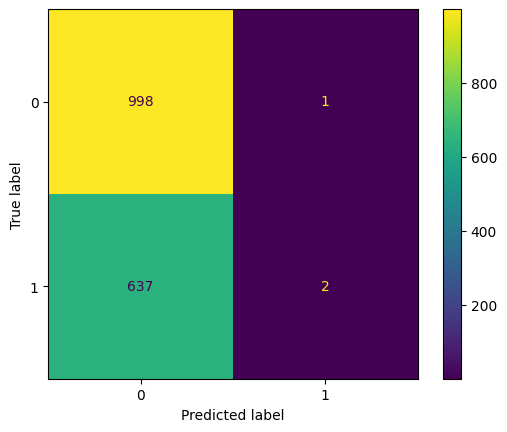

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_reg, labels=model_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_reg.classes_)
disp.plot()

plt.show()

## Model 2: Decision Tree Classifier

#### Train Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion= 'gini', min_samples_split=10, splitter = "best")
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=10)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [46]:
# Checking Accuracy
from sklearn.metrics import accuracy_score
y_pred_dt = model_dt.predict(X_test)
AS = accuracy_score(y_test, y_pred_dt)*100
print(f"Accuracy_score : {AS}")

Accuracy_score : 56.53235653235653


#### Confusion Matrix and Classification Report


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
CF = confusion_matrix(y_test, y_pred_dt)
CR = classification_report(y_test, y_pred_dt)
print(CR)

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       999
           1       0.44      0.45      0.45       639

    accuracy                           0.57      1638
   macro avg       0.54      0.54      0.54      1638
weighted avg       0.57      0.57      0.57      1638



In [48]:
print(CF)

[[638 361]
 [351 288]]


## Model 3: Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)

RandomForestClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.


In [50]:
# Checking Accuracy
from sklearn.metrics import accuracy_score
y_pred_ranfor = ranfor.predict(X_test)
AS = accuracy_score(y_test, y_pred_ranfor)*100
print(f"Accuracy_score : {AS}")

Accuracy_score : 66.05616605616605


## Model 4: KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

In [52]:
# Checking Accuracy
from sklearn.metrics import accuracy_score
y_pred_knn = knn.predict(X_test)
AS = accuracy_score(y_test, y_pred_knn)*100
print(f"Accuracy_score : {AS}")

Accuracy_score : 60.317460317460316


## Model 5: Support Vector Classifier

In [53]:
from sklearn.svm import SVC, LinearSVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

In [54]:
# Checking Accuracy
from sklearn.metrics import accuracy_score
y_pred_svm = svm.predict(X_test)
AS = accuracy_score(y_test, y_pred_svm)*100
print(f"Accuracy_score : {AS}")

Accuracy_score : 67.76556776556777


## Model 6: Naive Bayes 

In [55]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

In [56]:
# Checking Accuracy
from sklearn.metrics import accuracy_score
y_pred_nb = nb.predict(X_test)
AS = accuracy_score(y_test, y_pred_nb)*100
print(f"Accuracy_score : {AS}")

Accuracy_score : 61.965811965811966


## Overall Evaluation of the six models

<table ><tr><th>Model</th> 
    <th>Accuracy</th>
    <tr><td> Logistic Regresion </td><td> 62.85%</td></tr>
    <tr><td> K-Nearest neighbors  </td><td> 63.49%</td></tr>
    <tr><td>Support Vector Classifier </td><td> 68.85%</td></tr>
    <tr><td>Naive Bayes </td><td> 63.68%</td></tr>
    <tr><td>Decision tree </td><td>58.96%</td></tr>
    <tr><td>Random Forest </td><td>68.21% </td></tr>
    </table>

    

In [57]:
# Assuming your SVM model is named 'svm' and the feature values are provided in a list
# List of features for prediction
#features = [[5.735724, 158.318741, 25363.016594, 7.728601, 377.543291, 568.304671, 13.626624, 75.952337, 4.732954]]

# Example values for features to predict potability as 1 (safe for drinking)
features = [[0.288593,1.227231,-0.031677,-0.337185,2.039489,-1.571689,1.950835,0.120936,0.353029]]


# Make a prediction
X_SVM = svm.predict(features)

print("The potability of water for the given values is" ,X_SVM)

if X_SVM == 0:
    print("Unsafe Drinking Water!")
else:
    print("Safe Drinking Water!")


The potability of water for the given values is [1]
Safe Drinking Water!


In [58]:
print(X_test,svm.predict(X_test))

[[-0.79973783  0.0590278  -0.09875986 ... -0.3754991   0.50129159
   1.1957874 ]
 [ 1.81090453  0.40736491 -1.26801044 ... -0.11286685 -1.22449534
   2.05882317]
 [ 0.28859329  1.22723099 -0.03167695 ...  1.95083506  0.12093628
   0.35302908]
 ...
 [-0.39582541  1.17248114 -0.38859234 ... -0.05083557 -0.04888012
   0.53393326]
 [-0.02547355  1.01603391 -0.66746608 ... -1.65328003  0.01363603
   0.81272745]
 [-0.23330503  0.99649125 -0.7934036  ... -0.15188729  0.62573835
   0.28669535]] [0 0 1 ... 0 0 0]


In [59]:
pd.set_option('display.max_columns',None)

In [60]:
x_test=pd.DataFrame(X_test)

In [61]:
x_test

,0,1,2,3,4,5,6,7,8
0,-0.799738,0.059028,-0.098760,1.265206,-0.203498,-1.408416,-0.375499,0.501292,1.195787
1,1.810905,0.407365,-1.268010,-0.641700,0.680296,0.286625,-0.112867,-1.224495,2.058823
2,0.288593,1.227231,-0.031677,-0.337185,2.039489,-1.571689,1.950835,0.120936,0.353029
3,-0.422783,-0.183974,0.002380,-0.131146,-0.014799,-0.894764,-0.643028,0.051050,-0.694280
4,0.266948,0.500279,-0.608450,-1.065180,0.912963,-0.832745,-2.464209,-1.252702,1.313516
...,...,...,...,...,...,...,...,...,...
1633,1.429698,2.592408,2.947201,0.763183,-0.520904,-0.048098,-1.304801,-0.148211,-1.290720
1634,-0.025474,-1.318167,0.740360,0.823342,-0.014799,-0.988643,0.258093,-1.143013,-0.174175
1635,-0.395825,1.172481,-0.388592,0.946664,-0.871016,0.196742,-0.050836,-0.048880,0.533933
1636,-0.025474,1.016034,-0.667466,-1.382711,-0.014799,0.280169,-1.653280,0.013636,0.812727


In [62]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [63]:
import joblib 
joblib.dump(svm, "svm.pkl")

['svm.pkl']